In [1]:
import anndata
import scanpy as sc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2-wmeta.h5ad'
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 78223 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [6]:
def print_column_info(df):
    for c in df.columns:
        # Explicitly set observed=False to retain current behavior and suppress the warning
        grouped = df[[c]].groupby(c, observed=False).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print(f"Number of unique {c} = {len(grouped)} {members}")


In [7]:
print_column_info(adata.obs)

Number of unique cell_barcode = 77430 
Number of unique barcoded_cell_sample_label = 15 ['299_A02', '299_B02', '308_A03', '308_B03', '308_C03', '323_A02', '332_A01', '332_B01', '332_C01', '341_A01', '341_B01', '341_C01', '344_A04', '344_B04', '344_C04']
Number of unique library_label = 15 ['L8TX_200723_01_F09', 'L8TX_200723_01_G09', 'L8TX_200730_01_B02', 'L8TX_200730_01_G02', 'L8TX_200730_01_H12', 'L8TX_200813_01_D10', 'L8TX_200820_01_D01', 'L8TX_200820_01_E02', 'L8TX_200820_01_E08', 'L8TX_200827_01_B09', 'L8TX_200827_01_E09', 'L8TX_200827_01_E10', 'L8TX_200827_01_F09', 'L8TX_200827_01_G08', 'L8TX_200827_01_H08']
Number of unique feature_matrix_label = 1 ['WMB-10Xv3-CTXsp']
Number of unique entity = 1 ['cell']
Number of unique brain_section_label = 0 []
Number of unique library_method = 1 ['10Xv3']
Number of unique region_of_interest_acronym = 1 ['CTXsp']
Number of unique donor_label = 6 ['Snap25-IRES2-Cre;Ai14-532618', 'Snap25-IRES2-Cre;Ai14-533254', 'Snap25-IRES2-Cre;Ai14-536273', 'S

In [8]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [11]:
cell_subsampled = adata.obs
print(len(cell_subsampled))

78223


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


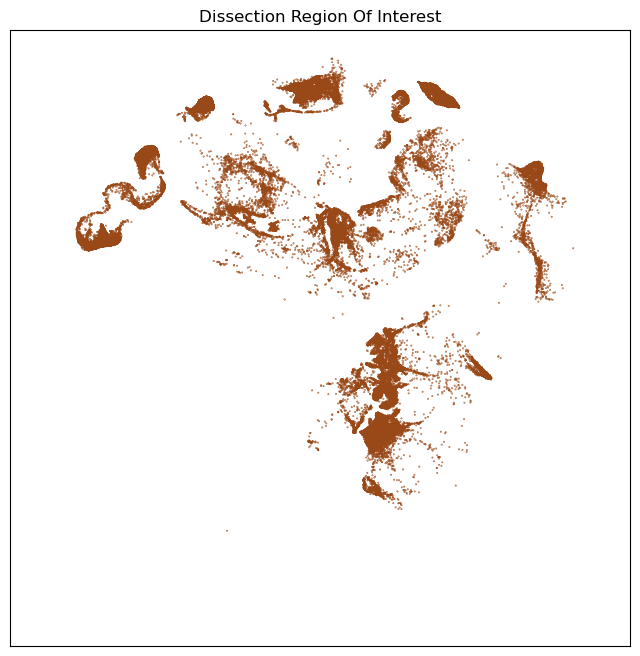

In [12]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


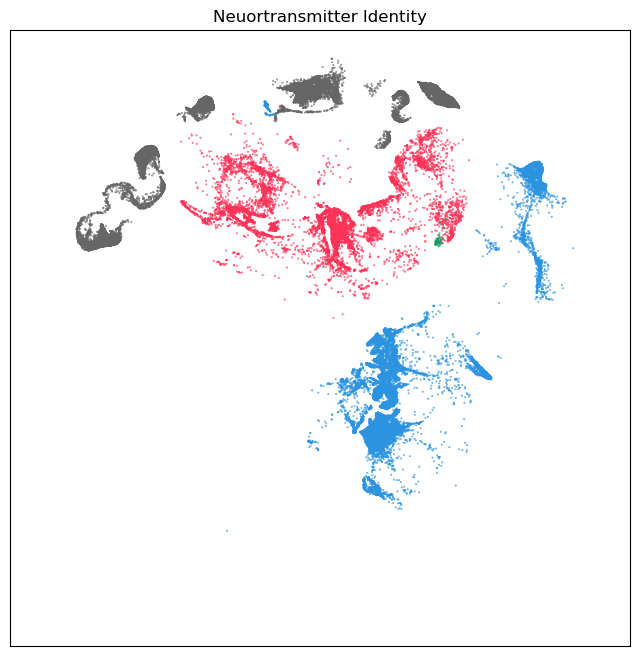

In [13]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter Identity")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


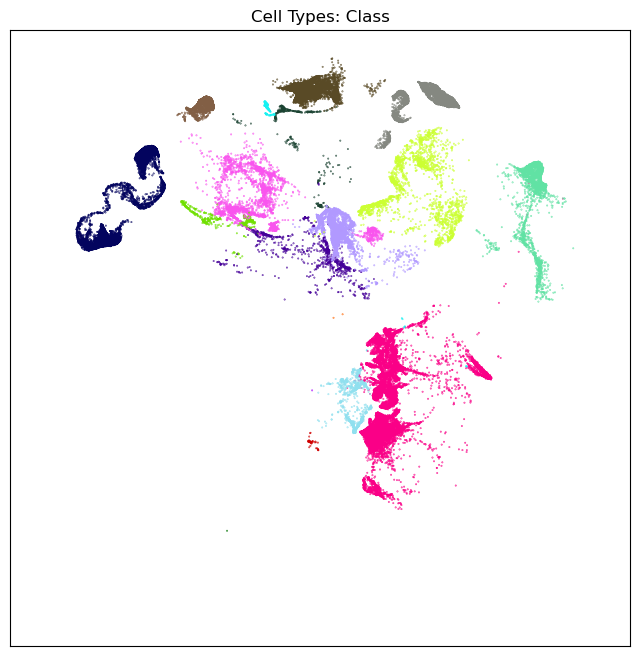

In [14]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


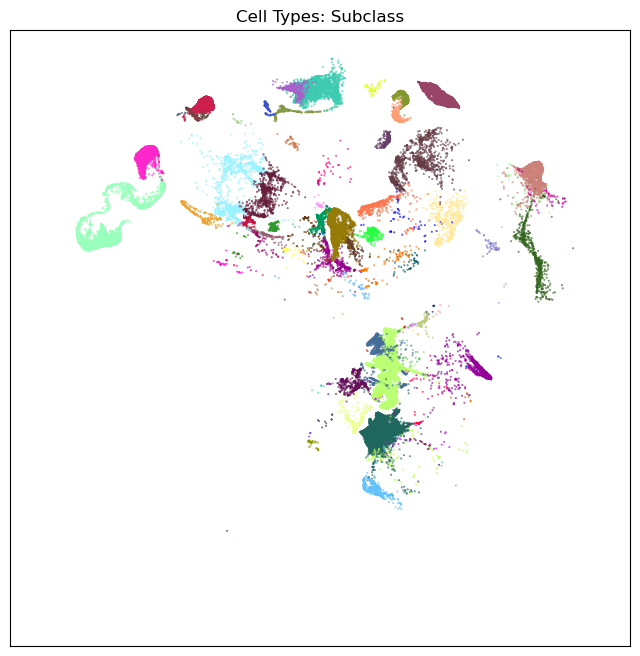

In [15]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")
plt.show()